![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia original**: Luan Lima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 2: Erros no algoritmo da bisseção

## Questão 1: Todos os pontos da bisseção

Neste teste vamos estudar a evolução do erro no eixo $y$ no decorrer do algoritmo da bisseção.
Para isso, vamos usar uma variação do método da bisseção que retorne
uma lista com todos os pontos percorridos pelo algoritmo até atingir o critério de parada.

Implemente a função `bissecao_pts`, utilizando como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def bissecao_pts(f, a, b, x=0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    niter = 0
    ncalls = 0
    y_pts = []
    while abs(a-b) > xtol:
        if niter == maxiter:
            return y_pts
        
        niter += 1
        ncalls += 2
        m = (a+b)/2
        y_pts.append(m)
        f_m = f(m)
        
        if f(a)*f_m < 0:
            b = m
            if abs(f_m-x) <= ytol:
                return y_pts
            
        else:
            a = m   
            if abs(f_m-x) <= ytol:
                return y_pts
            
    return y_pts

Alguns testes básicos para esta nova bisseção.

In [3]:
def p(a): 
    def f(x): return np.tan(x)-a
    return f

In [4]:
pts = bissecao_pts(p(1),0,np.pi/2, ytol=0)
assert abs(pts[-1]-np.pi/4) < 1e-8

In [5]:
for a in np.logspace(1,4):
    pts = bissecao_pts(p(a),0,np.pi/2, xtol=0)
    assert 1e-10 < abs(np.tan(pts[-1])-a) < 1e-8, (a, abs(np.tan(pts[-1])-a), len(pts))
    assert 1e-8 < abs(np.tan(pts[-2])-a)

In [6]:
for n in range(2,10):
    pts = bissecao_pts(p(n),0,np.pi/2, xtol=0)
    print(len(pts))
    assert 25 < len(pts) <= 35

29
29
30
31
32
32
33
33


## Questão 2: Aquecimento

Vamos começar estudando como se comporta o erro em $y$ para a função $f(x) = \sin(x)$. Faça um gráfico que contenha:
- no eixo horizontal, o número $n$ de iterações realizadas
- no eixo vertical, o erro em $y$ após a $n$-ésima iteração.

Utilize o intervalo padrão abaixo para todas as questões do teste.

In [7]:
a = -1+1e-12
b = 1/2

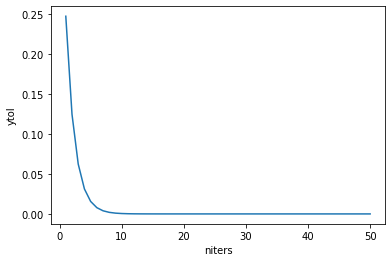

In [8]:
def f(x):
    return np.sin(x)

x = np.linspace(0, 49)+1
y = []
for i in x:
    valor = bissecao_pts(f,a,b, maxiter=i, ytol=0, xtol=0)
    y.append(abs(f(valor[-1])))
    
plt.plot(x,y)
plt.xlabel('niters')
plt.ylabel('ytol');

Comente o gráfico. O que você observa sobre a velocidade de convergência do método?

Nos primeiros valores de x (niter) a velocidade é maior, depois vai se estabilizando até que não fiquei visíviel nenhuma mudança, para inspecionar melhor deveria ser feita uma mudança de escala, porém de qualquer maneira há uma queda considerável na velocidade de convergência.

Agora represente, em um mesmo gráfico, a evolução do erro em $y$ para as funções $f(x) = \sin(x)$ e $g(x) = \sqrt[3]{x}$ (use `np.cbrt`).

Não se esqueça de botar título, legendas e labels nos eixos.

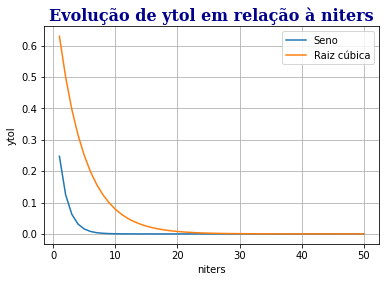

In [9]:
def f(x):
    return np.sin(x)

def g(x):
    return np.cbrt(x)

x = np.linspace(0, 49)+1
y_sin = []
y_sqrt = []
for i in x:
    valor_sin = bissecao_pts(f,a,b, maxiter=i, ytol=0, xtol=0)
    y_sin.append(abs(f(valor_sin[-1])))
    valor_sqrt = bissecao_pts(g,a,b, maxiter=i, ytol=0, xtol=0)
    y_sqrt.append(abs(g(valor_sqrt[-1])))
    
plt.title("Evolução de ytol em relação à niters", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})
plt.plot(x, y_sin, label='Seno')
plt.plot(x, y_sqrt, label='Raiz cúbica')
plt.xlabel('niters')
plt.ylabel('ytol')
plt.grid()
plt.legend()
ax = plt.gca();

In [10]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [11]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Compare a velocidade de convergência do método relativamente às duas funções. Como você explica essa diferença? Sinta-se à vontade para utilizar mais gráficos ou caixas de código para ajudar na sua explicação.

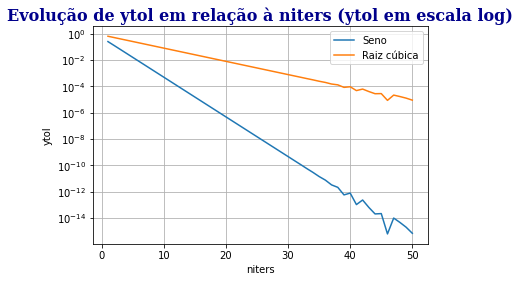

In [12]:
x = np.linspace(0, 49)+1
y_sin = []
y_sqrt = []
for i in x:
    valor_sin = bissecao_pts(f,a,b, maxiter=i, ytol=0, xtol=0)
    y_sin.append(abs(f(valor_sin[-1])))
    valor_sqrt = bissecao_pts(g,a,b, maxiter=i, ytol=0, xtol=0)
    y_sqrt.append(abs(g(valor_sqrt[-1])))
    
plt.semilogy(x, y_sin, label='Seno')
plt.semilogy(x, y_sqrt, label='Raiz cúbica')
plt.xlabel('niters')
plt.ylabel('ytol')
plt.grid()
plt.legend()
plt.title("Evolução de ytol em relação à niters (ytol em escala log)", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16});

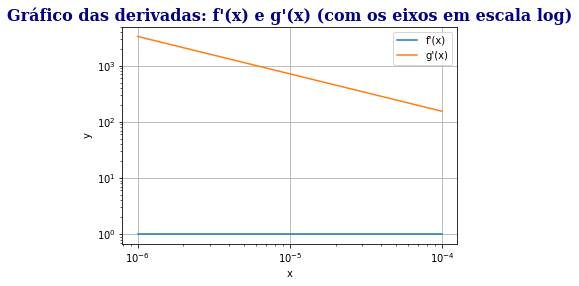

In [26]:
def f_der(x):
    return np.cos(x)

def g_der(x):
    return 1/(3*(x**(2/3)))

x = np.linspace(0+1e-6, 1e-4)
y_f = f_der(x)
y_g = g_der(x)

plt.loglog(x, y_f, label='''f'(x)''')
plt.loglog(x, y_g, label='''g'(x)''')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title("Gráfico das derivadas: f'(x) e g'(x) (com os eixos em escala log)", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16});

Essa diferença se da pela diferença das derivadas das funções, conforme niters aumenta, o ytol vai convergindo para 0 que é a raiz da função (o valor alvo), porém a velocidade de convergência varia de acordo com a derivada das funções, observando o gráfico das derivadas acima, podemos visualizar melhor, conforme x vai tendendo para 0 a diferença vai aumentando, da mesma forma que acontece quando niters AUMENTA. 

OBS: Os gráficos estão espelhados, para compara-los devemos reparar que conforme niters aumenta (andando pra direita) o valor se aproxima de 0, o que no gráfico das derivadas acontece andando para a esquerda. Isso vai acontecer novamente na questão 3 abaixo.

## Questão 3: Uma função diferentona

Agora vamos bolar uma função um pouco diferente para explorar os limites do método de bisseção. A função vai ser:

In [14]:
def h(x):
    return np.sign(x) / np.log(np.abs(x))

Faça um gráfico dessa função em uma vizinhança de 0.

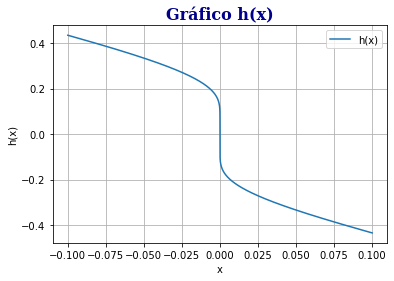

In [15]:
x = np.linspace(-1e-1,1e-1, num=100000)
y = h(x)

plt.plot(x,y, label = 'h(x)')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()
plt.legend()
plt.title("Gráfico h(x)", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})
ax = plt.gca();

In [16]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

Faça mais um gráfico, dessa vez comparando a evolução dos erros para as funções $f$, $g$ e $h$.

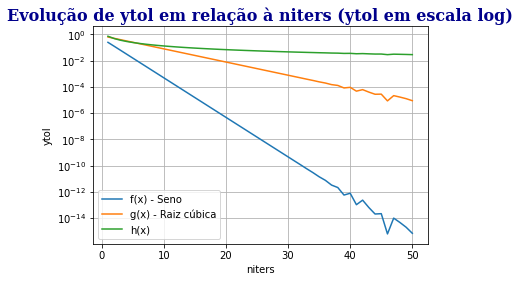

In [17]:
x = np.linspace(0, 49)+1
y_f = []
y_g = []
y_h = []

for i in x:
    valor_f = bissecao_pts(f,a,b, maxiter=i, ytol=0, xtol=0)
    y_f.append(abs(f(valor_f[-1])))
    valor_g = bissecao_pts(g,a,b, maxiter=i, ytol=0, xtol=0)
    y_g.append(abs(g(valor_g[-1])))
    valor_h = bissecao_pts(h,a,b, maxiter=i, ytol=0, xtol=0)
    y_h.append(abs(h(valor_h[-1])))  

plt.semilogy(x, y_f, label='f(x) - Seno')
plt.semilogy(x, y_g, label='g(x) - Raiz cúbica')
plt.semilogy(x, y_h, label='h(x)')
plt.xlabel('niters')
plt.ylabel('ytol')
plt.grid()
plt.legend()
plt.title("Evolução de ytol em relação à niters (ytol em escala log)", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})
ax = plt.gca();

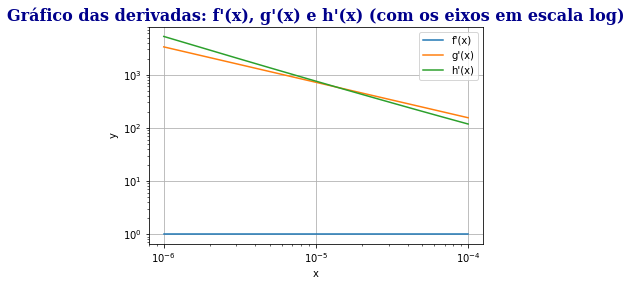

In [27]:
def h_der(x):
    return 1/(x*(np.log(x)**2))

x = np.linspace(0+1e-6, 1e-4)
y_f = f_der(x)
y_g = g_der(x)
y_h = h_der(x)

plt.loglog(x, y_f, label='''f'(x)''')
plt.loglog(x, y_g, label='''g'(x)''')
plt.loglog(x, y_h, label='''h'(x)''')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title("Gráfico das derivadas: f'(x), g'(x) e h'(x) (com os eixos em escala log)", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16});

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que aconteceu desta vez? Explique o porquê.

Da mesma forma que antes, a diferença das derivadas conforme o x tende para 0 (podemos observar no gráfico acima), resulta numa diferença na velocidade de convergência.

## Questão 4: O outro lado da moeda

Para fechar com chave de ouro, vamos estudar a evolução do erro da função $h_2(x) = h^{-1}(x)$, isto é, a função $h_2$ tal que $h_2(h(x)) = x$ (digamos, em uma vizinhança de $x=0$). Implemente a função $h_2$ abaixo:

In [20]:
def h2(x):
    return -np.sign(x)*(np.e**(-1/np.abs(x)))

In [21]:
for x in np.linspace(-1+1e-8,1-1e-8,200):
    assert abs(h2(h(x))-x) < 1e-15, (x, x - h2(h(x)))
    assert abs(h(h2(x))-x) < 1e-15, (x, x - h(h2(x)))

Repita os estudos realizados anteriormente, com a inclusão de $h_2$.

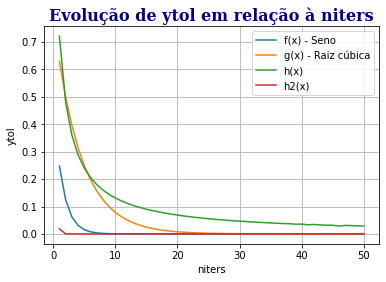

In [22]:
x = np.linspace(0, 49)+1
y_f = []
y_g = []
y_h = []
y_h2 = []

for i in x:
    valor_f = bissecao_pts(f,a,b, maxiter=i, ytol=0, xtol=0)
    y_f.append(abs(f(valor_f[-1])))
    valor_g = bissecao_pts(g,a,b, maxiter=i, ytol=0, xtol=0)
    y_g.append(abs(g(valor_g[-1])))
    valor_h = bissecao_pts(h,a,b, maxiter=i, ytol=0, xtol=0)
    y_h.append(abs(h(valor_h[-1])))  
    valor_h2 = bissecao_pts(h2,a,b, maxiter=i, ytol=0, xtol=0)
    y_h2.append(abs(h2(valor_h2[-1])))  

plt.plot(x, y_f, label='f(x) - Seno')
plt.plot(x, y_g, label='g(x) - Raiz cúbica')
plt.plot(x, y_h, label='h(x)')
plt.plot(x, y_h2, label='h2(x)')
plt.xlabel('niters')
plt.ylabel('ytol')
plt.grid()
plt.legend()
plt.title("Evolução de ytol em relação à niters", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})
ax = plt.gca();

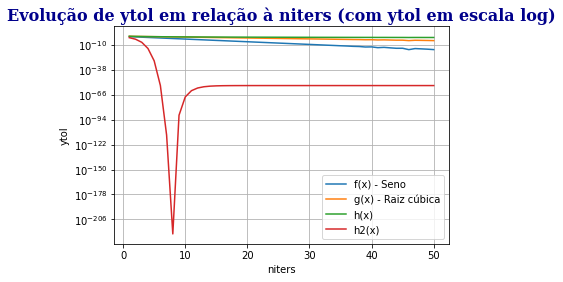

In [23]:
x = np.linspace(0, 49)+1
y_f = []
y_g = []
y_h = []
y_h2 = []

for i in x:
    valor_f = bissecao_pts(f,a,b, maxiter=i, ytol=0, xtol=0)
    y_f.append(abs(f(valor_f[-1])))
    valor_g = bissecao_pts(g,a,b, maxiter=i, ytol=0, xtol=0)
    y_g.append(abs(g(valor_g[-1])))
    valor_h = bissecao_pts(h,a,b, maxiter=i, ytol=0, xtol=0)
    y_h.append(abs(h(valor_h[-1])))  
    valor_h2 = bissecao_pts(h2,a,b, maxiter=i, ytol=0, xtol=0)
    y_h2.append(abs(h2(valor_h2[-1])))  

plt.semilogy(x, y_f, label='f(x) - Seno')
plt.semilogy(x, y_g, label='g(x) - Raiz cúbica')
plt.semilogy(x, y_h, label='h(x)')
plt.semilogy(x, y_h2, label='h2(x)')
plt.xlabel('niters')
plt.ylabel('ytol')
plt.grid()
plt.legend()
plt.title("Evolução de ytol em relação à niters (com ytol em escala log)", 
          fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})
ax = plt.gca();

Comente os resultados abaixo.

Como sabemos que a diferença na velocidade de convergência se dá pela diferença das derivadas (conforme o x vai tendendo para 0 nesse caso), podemos observar que há uma queda brusca no valor da derivada de h2(x) por volta da 8º iteração (que é algum ponto a uma certa distância de x=0), e depois (conforme x vai ficando com uma distância menor de x=0) a derivada de h2(x) vai subindo novamente, até que começa a se estabilizar. Uma observação é que a derivada de h2(x) se mostra inferior às demais funções do gráfico.